In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv("dataset_1.csv")

In [27]:
print(data.head())
print(data.info())

   feature_0  feature_1  feature_2  feature_3  feature_4  target
0   0.653678   0.439913   0.930429   0.495219   0.424872       0
1   0.442538   0.613668   0.770012   0.198239   0.527990       1
2   0.145516   0.475226   0.579444   0.504736   0.008229       0
3   0.403098   0.098301   0.749912   0.599900   0.907928       1
4   0.004218   0.367666   0.134251   0.953294   0.168636       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  1000 non-null   float64
 1   feature_1  1000 non-null   float64
 2   feature_2  1000 non-null   float64
 3   feature_3  1000 non-null   float64
 4   feature_4  1000 non-null   float64
 5   target     1000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 47.0 KB
None


In [28]:
X = data.drop(columns=["feature_4"])
y = data["target"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
20/20 [==============================] - 1s 15ms/step - loss: 0.5870 - accuracy: 0.7828 - val_loss: 0.4419 - val_accuracy: 0.9937
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3702 - accuracy: 0.9859 - val_loss: 0.2303 - val_accuracy: 1.0000
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1893 - accuracy: 0.9984 - val_loss: 0.0908 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.0797 - accuracy: 1.0000 - val_loss: 0.0341 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.0211 - accuracy: 0.9984 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 8/10
20/20 [=

In [34]:
_, accuracy = model.evaluate(X_test_scaled, y_test)
print("Accuracy:", accuracy)

7/7 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Accuracy: 1.0


In [35]:
new_data = pd.DataFrame({
    "feature_0": [0.2],
    "feature_1": [0.5],
    "feature_2": [0.7],
    "feature_3": [0.8],
    "target": [0.9]
})
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
print("Decision:", prediction)

1/1 [==============================] - 0s 82ms/step
Decision: [[0.99489826]]


7/7 [==============================] - 0s 2ms/step


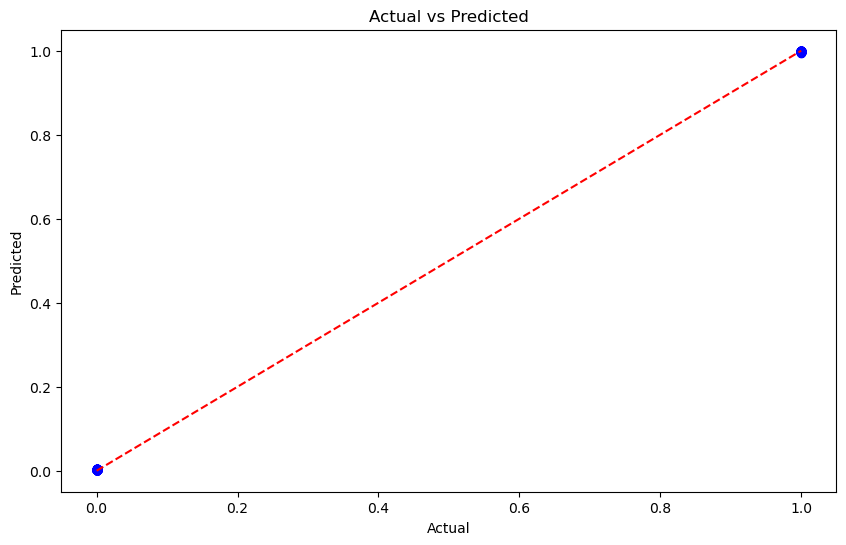

In [36]:
y_pred_test = model.predict(X_test_scaled)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Diagonal line representing perfect predictions
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()